In [1]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
with open('intents.json') as content:
  data1 = json.load(content)

In [3]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [4]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [5]:
#printing the data
data

,inputs,tags
0,Hi,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
5,Whats up,greeting
6,cya,goodbye
7,See you later,goodbye
8,Goodbye,goodbye
9,I am Leaving,goodbye


In [6]:
data = data.sample(frac=1)

In [7]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
22,id like to buy something,shop
15,how old are you,age
2,is anyone there,greeting
33,draw your last pathetic card,cardgames
16,age,age
4,good day,greeting
9,i am leaving,goodbye
23,whats on the menu,shop
6,cya,goodbye
13,how old is tim,age


In [8]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [9]:
input_shape = x_train.shape[1]
print(input_shape)

6


In [10]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  63
output length:  7


In [11]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [13]:
#training the model
train = model.fit(x_train,y_train,epochs=4000)

Epoch 1/4000
2/2 [==============================] - 2s 12ms/step - loss: 1.9499 - accuracy: 0.0857
Epoch 2/4000
2/2 [==============================] - 0s 4ms/step - loss: 1.9466 - accuracy: 0.1143
Epoch 3/4000
2/2 [==============================] - 0s 5ms/step - loss: 1.9442 - accuracy: 0.2000
Epoch 4/4000
2/2 [==============================] - 0s 5ms/step - loss: 1.9419 - accuracy: 0.2286
Epoch 5/4000
2/2 [==============================] - 0s 5ms/step - loss: 1.9398 - accuracy: 0.2857
Epoch 6/4000
2/2 [==============================] - 0s 6ms/step - loss: 1.9378 - accuracy: 0.2857
Epoch 7/4000
2/2 [==============================] - 0s 4ms/step - loss: 1.9356 - accuracy: 0.2857
Epoch 8/4000
2/2 [==============================] - 0s 5ms/step - loss: 1.9335 - accuracy: 0.2286
Epoch 9/4000
2/2 [==============================] - 0s 5ms/step - loss: 1.9314 - accuracy: 0.2000
Epoch 10/4000
2/2 [==============================] - 0s 6ms/step - loss: 1.9291 - accuracy: 0.2000
Epoch 11/4000
2/2 

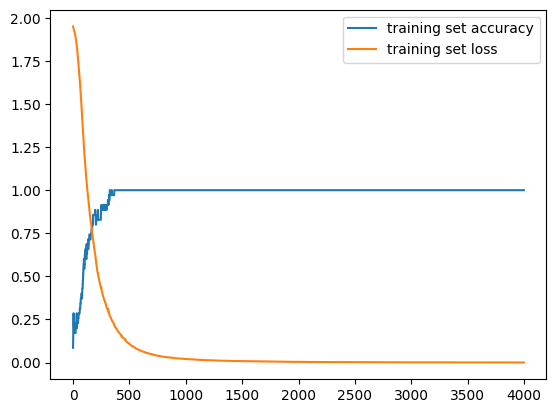

In [14]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [18]:
#chatting
import random
filename='intents.json'

while True:
   
    file = open(filename,'r+')
    file_data = json.load(file)

    truth_check_input = 0
    truth_check_response = 0
    texts_p = []
    prediction_input = input('You : ');
    prediction_input_clone = prediction_input

    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)

    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    
    
   
    # Join new_data with file_data inside emp_details
    for i in file_data['intents']:
        if (response_tag in i['tag']) == True :
            #print(i['input'])
            
            for k in i['input']:
                print(k)
                if (k == prediction_input_clone) == True :
                    truth_check_input = 1
                    break
            for k in i['responses']:
                print(k)
                if (k == prediction_input_clone) == True :
                    truth_check_response = 1
                    break
            if truth_check_input == 0 :
                i['input'].append(prediction_input_clone)
                print(i['input'])
            if truth_check_response == 0 :
                i['responses'].append(prediction_input_clone)
                print(i['responses'])
            
    # Sets file's current position at offset.
    file.seek(0)
    # convert back to json.
    json.dump(file_data, file, indent = 4)
    file.close()      
      
    print("Going Ballistic: ",random.choice(responses[response_tag]))
    if response_tag == "goodbye":
        
        break

You : owo
1/1 [==============================] - 0s 24ms/step
Hi
How are you
Is anyone there?
Hello
Good day
Whats up
Hello!
Good to see you again!
Hi there, how can I help?
Hello
['Hi', 'How are you', 'Is anyone there?', 'Hello', 'Good day', 'Whats up', 'owo']
['Hello!', 'Good to see you again!', 'Hi there, how can I help?', 'Hello', 'owo']
Going Ballistic:  Hi there, how can I help?
You : let's play
1/1 [==============================] - 0s 23ms/step
how old
how old is tim
what is your age
how old are you
age?
Lets play!
bye
I am 18 years old!
18 years young!
Lets play!
bye
['how old', 'how old is tim', 'what is your age', 'how old are you', 'age?', 'Lets play!', 'bye', "let's play"]
['I am 18 years old!', '18 years young!', 'Lets play!', 'bye', "let's play"]
Going Ballistic:  I am 18 years old!
You : goodbye
1/1 [==============================] - 0s 24ms/step
cya
See you later
Goodbye
I am Leaving
Have a Good day
Heya
Sad to see you go :(
Talk to you later
Goodbye!
Heya
['cya', 'See